## 5.2.3
### Inspect the data

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Load files
city_data_to_load = os.path.join("../Resources/city_data.csv")
ride_data_to_load = os.path.join("../Resources/ride_data.csv")

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## 5.2.4 Merging Data into a DataFrame

### Inspect City_Data

In [6]:
# Check for null values
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Check if driver_count is int
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get unique values present in a particular column
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of cities marked as Urban
sum(city_data_df["type"] == "Urban")

66

In [11]:
sum(city_data_df["type"] == "Suburban")

36

In [12]:
sum(city_data_df["type"] == "Rural")

18

### Inspecting Ride Data

In [13]:
# Get comlumns and rows that are not null -- all having the same number indicates no null values
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Double check with this
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Check for int -- possibility of performing numeric operations
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [16]:
# The Merge
# 'on' tells us to merger on the city column, which the two dataframes have in common
# 'how' tells us that we are going to add the data from city_data_df to the end of _ride_data_df, 
# even if it's not there -- "end" means all the way on the right, not the bottom
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.tail(20)

,city,date,fare,ride_id,driver_count,type
2355,North Holly,2019-01-03 19:51:01,19.90,5559509612597,8,Rural
2356,New Ryantown,2019-05-05 19:29:38,26.53,2302209966018,2,Rural
2357,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural
2358,Lake Latoyabury,2019-02-25 04:10:19,16.18,8492924830016,2,Rural
2359,South Marychester,2019-01-19 11:40:46,49.44,90058815985,1,Rural
2360,Jessicaport,2019-01-31 17:57:25,58.29,623154556195,1,Rural
2361,Michaelberg,2019-03-22 22:20:54,38.30,8032727406577,6,Rural
2362,North Holly,2019-04-18 19:26:25,30.94,3441061016826,8,Rural
2363,Michaelberg,2019-03-13 14:40:18,37.72,8842606115175,6,Rural
2364,Lake Jamie,2019-02-25 23:46:02,28.65,5815763839331,4,Rural


## 5.3.1 Big Bouble Plot
### Ride count will be the x-axis and Average fare will be the y-axis, ultimately, so we need them seperate
### Driver Count will be the size of the bubbles
### Create dataframes for each type of city

In [17]:
# Urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [18]:
# Alternate using .loc
urban_cities_df = pyber_data_df.loc[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [19]:
# Create suburban and rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [20]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## 5.3.2 Get ride count for each city type

In [21]:
# Create series with "city" as the index. Populate values by count() (counting) the number of rid_id values for each of those cities
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
# Create ridecount series for the other two
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

## 5.3.3 Get average fare for each city per city type

In [23]:
# Create a series where "city" is the index and the values are populated by the mean of all the fares for that city
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

In [24]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

## 5.3.4 Get average number of drivers per city per city type

In [25]:
# I don't understand this one. As demonstrated by the below dataframe, each city's driver count is always the same.
# Why would I need an average?
south_jack_df = pyber_data_df.loc[pyber_data_df["city"] == "South Jack"]
south_jack_df

,city,date,fare,ride_id,driver_count,type
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
137,South Jack,2019-04-24 19:33:56,38.04,2197989679742,46,Urban
216,South Jack,2019-03-30 20:21:59,4.20,4817670763151,46,Urban
252,South Jack,2019-02-01 22:32:07,28.37,3372008354124,46,Urban
356,South Jack,2019-01-31 02:51:29,21.75,6971155853312,46,Urban
479,South Jack,2019-01-05 11:31:02,13.14,6809752015805,46,Urban
531,South Jack,2019-01-14 17:06:37,40.65,5440570608100,46,Urban
538,South Jack,2019-01-15 05:51:27,5.58,1793901526227,46,Urban
599,South Jack,2019-03-14 17:18:02,18.66,3511595408654,46,Urban
604,South Jack,2019-01-03 23:11:22,4.95,9005601861976,46,Urban


In [26]:
# Get the average number of drivers for each urban, suburban, and rural city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

## 5.3.5 Create multiple bubble charts

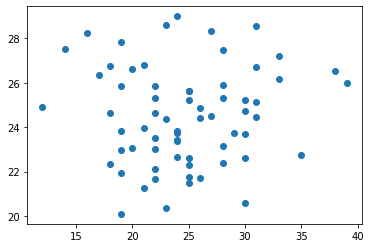

In [27]:
# Create the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

plt.show()

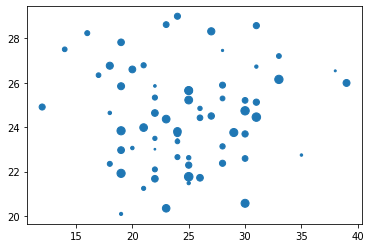

In [28]:
plt.scatter(urban_ride_count, urban_avg_fare,
           s=urban_driver_count)

plt.show()

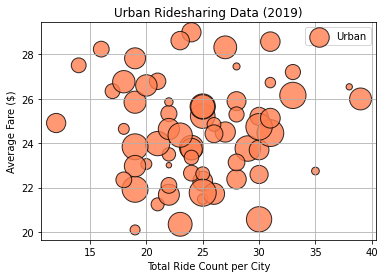

In [29]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[count * 10 for count in urban_driver_count], # can be written as s=10*urban_driver_count
            color='coral', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Urban')
plt.title("Urban Ridesharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

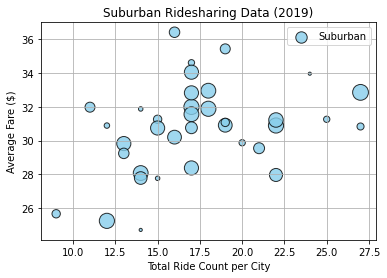

In [30]:
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count,
            color='skyblue', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Suburban')
plt.title("Suburban Ridesharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

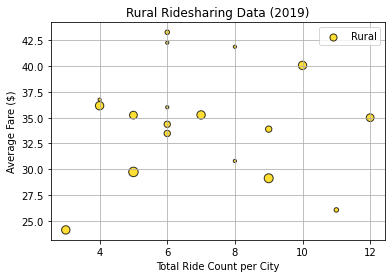

In [31]:
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[count * 10 for count in rural_driver_count], # can be written as s=10*rural_driver_count
            color='gold', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Rural')
plt.title("Rural Ridesharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

## 5.3.6 Combine the bubble charts

### To create the combined chart, add the plt.scatter() functions from all 3 charts to one cell and run it

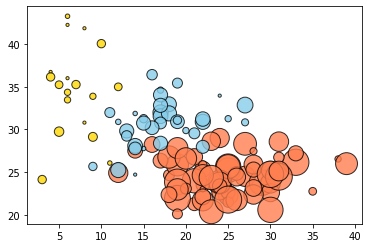

In [32]:
# Urban scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[count * 10 for count in urban_driver_count], # can be written as s=10*urban_driver_count
            color='coral', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Urban')

# Suburban scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count,
            color='skyblue', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Suburban')

# Rural scatter plot
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[count * 10 for count in rural_driver_count], # can be written as s=10*rural_driver_count
            color='gold', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Rural')

# Run 'em
plt.show()

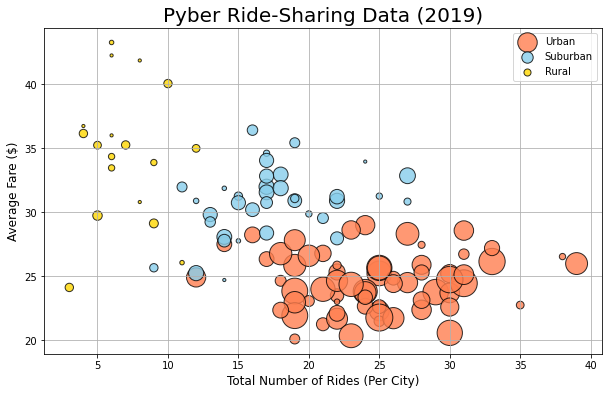

In [33]:
# This cell adds whole-chart formatting

# Chart size
plt.subplots(figsize=(10, 6))

# Urban scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[count * 10 for count in urban_driver_count], # can be written as s=10*urban_driver_count
            color='coral', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Urban')

# Suburban scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count,
            color='skyblue', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Suburban')

# Rural scatter plot
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[count * 10 for count in rural_driver_count], # can be written as s=10*rural_driver_count
            color='gold', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Rural')

# Incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20) # note font size parameter
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Plain Legend
plt.legend()

# Run 'em
plt.show()

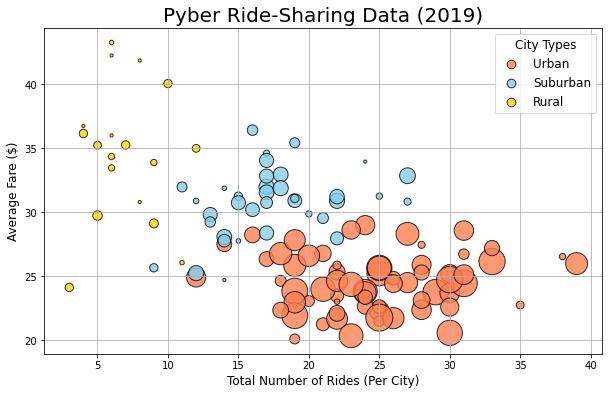

In [34]:
# This cell adds legend formatting

# Chart size
plt.subplots(figsize=(10, 6))

# Urban scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[count * 10 for count in urban_driver_count], # can be written as s=10*urban_driver_count
            color='coral', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Urban')

# Suburban scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count,
            color='skyblue', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Suburban')

# Rural scatter plot
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[count * 10 for count in rural_driver_count], # can be written as s=10*rural_driver_count
            color='gold', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Rural')

# Incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20) # note font size parameter
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# All this stuff formats the legend
lgnd = plt.legend(fontsize=12, mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.show()

## This cell will incorporate the note AND save the file. This is EVERYTHING

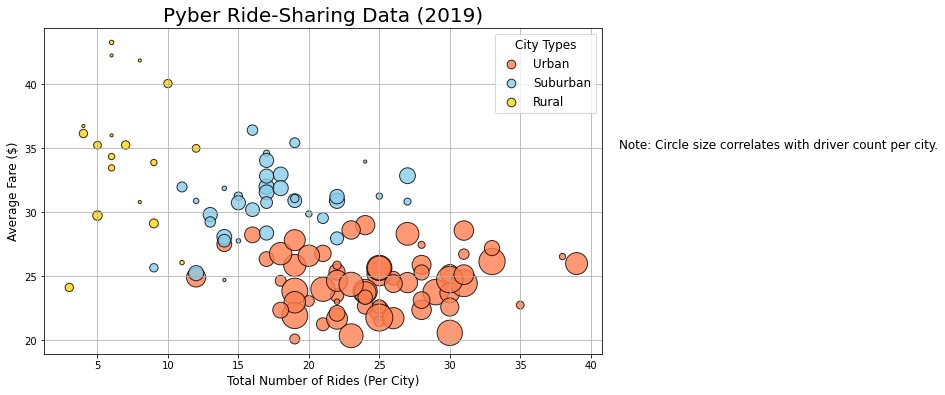

In [35]:
# This cell adds legend formatting

# Chart size
plt.subplots(figsize=(10, 6))

# Urban scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[count * 10 for count in urban_driver_count], # can be written as s=10*urban_driver_count
            color='coral', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Urban')

# Suburban scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count,
            color='skyblue', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Suburban')

# Rural scatter plot
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[count * 10 for count in rural_driver_count], # can be written as s=10*rural_driver_count
            color='gold', alpha=0.8, edgecolors='k', linewidth=1, 
            label='Rural')

# Incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20) # note font size parameter
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# All this stuff formats the legend
lgnd = plt.legend(fontsize=12, mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add a note to the side of the chart
# First two numbers are x/y coordinates based on the values in the chart. This is where the note is placed
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the figure as an image
plt.savefig("../analysis/Fig1.png")

plt.show()

## 5.4.1 Summary Statistics

In [36]:
# Get summary statistics on each type of city
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [37]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [38]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [39]:
# Get summary statistics on just ride count series for each city type

In [40]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [41]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [42]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
# Calculate the mean of the ride count per city type, rouded to 2 decimals
# This cell will print these all at once
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [44]:
# Same as above, using median
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [45]:
# Get the modes. There can be mulitple modes or no modes
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [46]:
suburban_ride_count.mode(), rural_ride_count.mode()

(0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

### Using mean, median, mode with NumPy and SciPy

In [47]:
import numpy as np
import scipy.stats as sts

In [48]:
# Following cells print these three measures of central tendency for each city type in one cell 

In [49]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean of ride counts for urban trips is {mean_urban_ride_count:.2f}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median of ride counts or urban trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode of ride counts for urban trips is {mode_urban_ride_count}')

The mean of ride counts for urban trips is 24.62
The median of ride counts or urban trips is 24.0
The mode of ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))


In [50]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean of ride counts for suburban trips is {mean_suburban_ride_count:.2f}')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median of ride counts or suburban trips is {median_suburban_ride_count}')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode of ride counts for suburban trips is {mode_suburban_ride_count}')

The mean of ride counts for suburban trips is 17.36
The median of ride counts or suburban trips is 17.0
The mode of ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))


In [51]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean of ride counts for rural trips is {mean_rural_ride_count:.2f}')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median of ride counts or rural trips is {median_rural_ride_count}')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode of ride counts for rural trips is {mode_rural_ride_count}')

The mean of ride counts for rural trips is 6.94
The median of ride counts or rural trips is 6.0
The mode of ride counts for rural trips is ModeResult(mode=array([6]), count=array([5]))


## 5.4.2 Same calculations for fares per city type

In [52]:
# First, create a data series of fares for each city type

In [53]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [54]:
# Calculate measures of central tendency
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is {mean_urban_fares:.2f}')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is {median_urban_fares}')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is {mode_urban_fares}')

The mean fare price for urban trips is 24.53
The median fare price for urban trips is 24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [55]:
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is {mean_suburban_fares:.2f}')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is {median_suburban_fares}')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is {mode_suburban_fares}')

The mean fare price for suburban trips is 30.97
The median fare price for suburban trips is 30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [56]:
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is {mean_rural_fares:.2f}')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is {median_rural_fares}')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is {mode_rural_fares}')

The mean fare price for rural trips is 34.62
The median fare price for rural trips is 37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


## 5.4.3 Same for driver count

In [57]:
# First create series based on driver_count from data frames

In [58]:
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [59]:
# Calculate all three measures, per city type

In [60]:
# Urban
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean number of drivers in urban cities is {mean_urban_drivers:.2f}')

median_urban_drivers = np.median(urban_drivers)
print(f'The median number of drivers in urban cities is {median_urban_drivers}')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode of drivers in urban cities is {mode_urban_drivers}')

The mean number of drivers in urban cities is 36.68
The median number of drivers in urban cities is 37.0
The mode of drivers in urban cities is ModeResult(mode=array([39]), count=array([86]))


In [61]:
# Suburban
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean number of drivers in suburban cities is {mean_suburban_drivers:.2f}')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median number of drivers in suburban cities is {median_suburban_drivers}')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode of drivers in suburan cities is {mode_suburban_drivers}')

The mean number of drivers in suburban cities is 13.71
The median number of drivers in suburban cities is 16.0
The mode of drivers in suburan cities is ModeResult(mode=array([20]), count=array([79]))


In [62]:
# Rural
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean number of drivers in rural cities is {mean_rural_drivers:.2f}')

median_rural_drivers = np.median(rural_drivers)
print(f'The median number of drivers in rural cities is {median_rural_drivers}')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode of drivers in rural cities is {mode_rural_drivers}')

The mean number of drivers in rural cities is 4.30
The median number of drivers in rural cities is 4.0
The mode of drivers in rural cities is ModeResult(mode=array([1]), count=array([32]))


## 5.4.4 Box-and-Whiskers charts

### Create box plots based on the series made in previous lesson

In [63]:
# Ride count

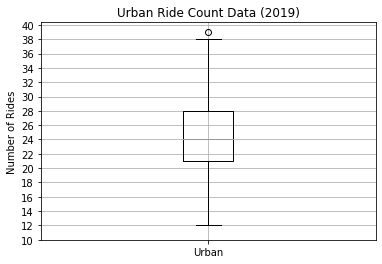

(None,
 count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64)

In [64]:
# Set a variable equal to list for x-axis labels
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Labels
ax.set_title("Urban Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid(True)

plt.show(), urban_ride_count.describe()

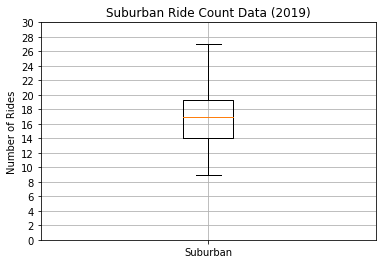

(None,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64)

In [65]:
# Chart
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Labels
ax.set_title("Suburban Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid() # set to True by default

plt.show(), suburban_ride_count.describe()

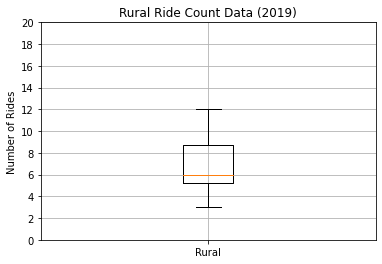

(None,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [66]:
# Chart
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Labels
ax.set_title("Rural Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid() # set to True by default

plt.show(), rural_ride_count.describe()

### Plot all three series in one chart

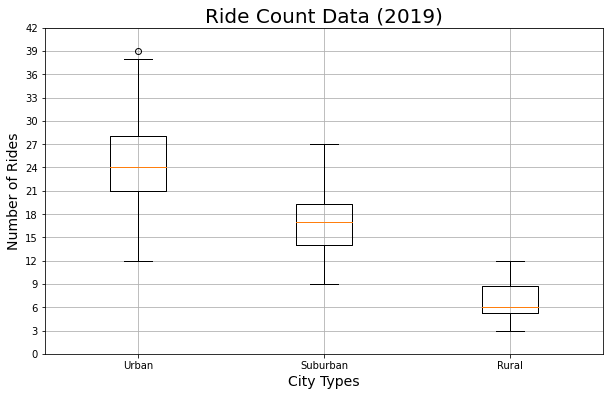

In [67]:
# Create Chart

x_labels = ["Urban", "Suburban", "Rural"]
# Create list of all the ride count series
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
# Set size and fig, ax variables
fig, ax = plt.subplots(figsize=(10, 6))
# Build chart from new list of series
ax.boxplot(ride_count_data, labels=x_labels)

# Titles
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))

# Add grid
ax.grid()

# Save the figure
plt.savefig("../analysis/Fig2.png")

plt.show()

In [68]:
# One urban city has an outlier ride count. Print it. Follow this logic 

In [69]:
# Urban ride count data
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [70]:
# Search urban_ride_count for the row in this series with a value of 39
urban_ride_count[urban_ride_count == 39]

city
West Angela    39
Name: ride_id, dtype: int64

In [71]:
# Isolate the index name, which is the city name in this case
urban_ride_count[urban_ride_count == 39].index[0]

'West Angela'

In [72]:
# Print it pretty
urban_ride_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_ride_outlier} has the highest rides count.')

West Angela has the highest rides count.


### Box and Whisker for Ride Fare Data

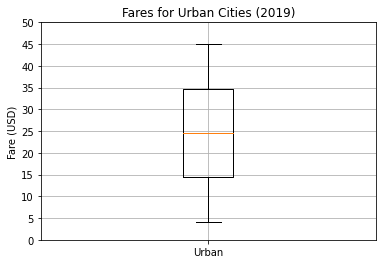

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [73]:
# Box and Whisker for urban fare data
# X Labels
x_labels = ["Urban"]
# Create plot
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Fares for Urban Cities (2019)")
ax.set_ylabel("Fare (USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))

# Add grid
ax.grid()

plt.show()

# Summary Statistics
urban_fares.describe()

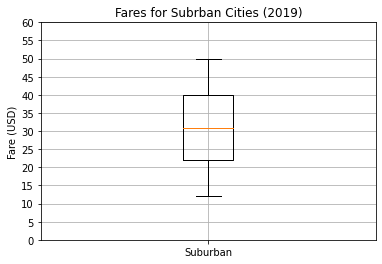

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [74]:
# Box and Whisker for suburban fare data
# X Labels
x_labels = ["Suburban"]
# Create plot
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Fares for Subrban Cities (2019)")
ax.set_ylabel("Fare (USD)")
ax.set_yticks(np.arange(0, 61, step=5.0))

# Add grid
ax.grid()

plt.show()

# Summary Statistics
suburban_fares.describe()

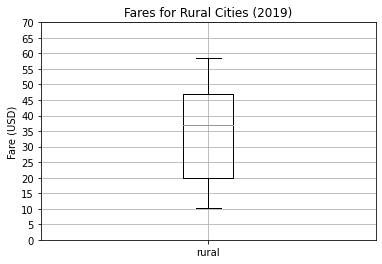

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [75]:
# Box and Whisker for rural fare data
# X Labels
x_labels = ["rural"]
# Create plot
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Fares for Rural Cities (2019)")
ax.set_ylabel("Fare (USD)")
ax.set_yticks(np.arange(0, 75, step=5.0))

# Add grid
ax.grid()

plt.show()

# Summary Statistics
rural_fares.describe()

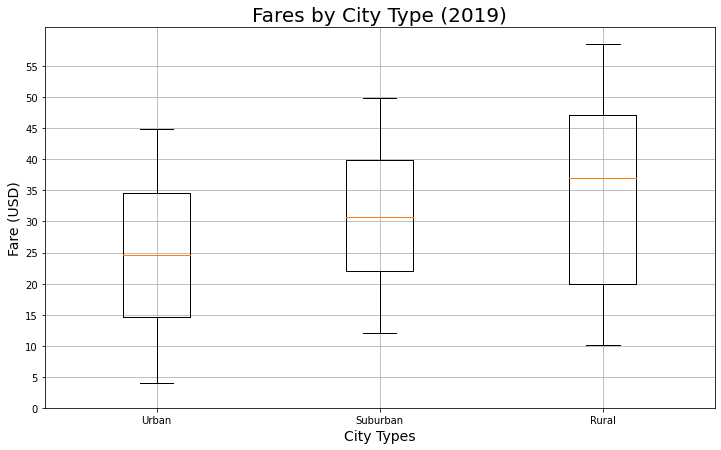

In [76]:
# Combine all three box plots for ride fare data

# X Labels
x_labels = ["Urban", "Suburban", "Rural"]

# Create list to house data sources
all_fare_data = [urban_fares, suburban_fares, rural_fares]
# Create plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(all_fare_data, labels=x_labels)

# Formatting
ax.set_title("Fares by City Type (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Fare (USD)", fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))

# Add grid
ax.grid()

# Save chart as png
plt.savefig("../analysis/Fig3.png")

plt.show()

### Box and Whiskers for Driver Count Data

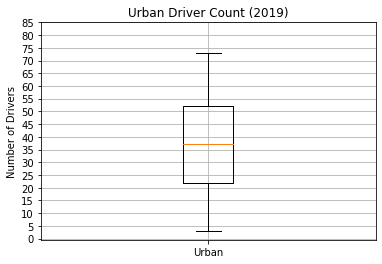

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [77]:
# Create chart for urban data

# List for x axis labels
x_labels = ["Urban"]

# Make chart
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Format
ax.set_title("Urban Driver Count (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()

# Display summary statistics
print("Summary Statistics")
urban_drivers.describe()

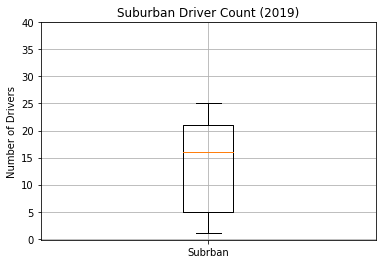

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [78]:
# Create chart for suburban data

# List for x axis labels
x_labels = ["Subrban"]

# Make chart
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Format
ax.set_title("Suburban Driver Count (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 41, step=5.0))
ax.grid()

plt.show()

# Display summary statistics
print("Summary Statistics")
suburban_drivers.describe()

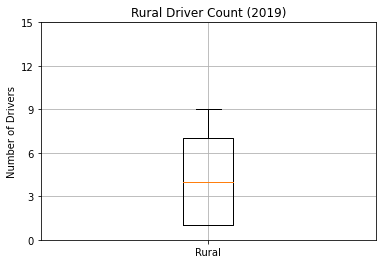

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [79]:
# Create chart for rural data

# List for x axis labels
x_labels = ["Rural"]

# Make chart
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Format
ax.set_title("Rural Driver Count (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 16, step=3.0))
ax.grid()

plt.show()

# Display summary statistics
print("Summary Statistics")
rural_drivers.describe()

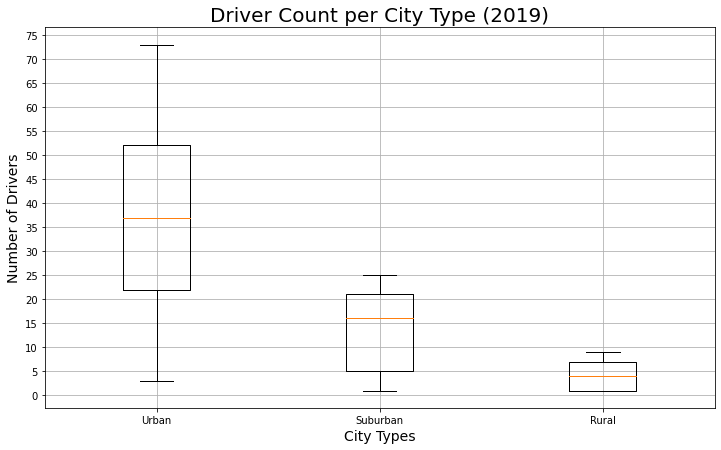

In [80]:
# Combine all three into one

# List for x axis labels
x_labels = ["Urban", "Suburban", "Rural"]

# List to store all datasets (series)
all_driver_counts = [urban_drivers, suburban_drivers, rural_drivers]

# Make chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(all_driver_counts, labels=x_labels)

# Format
ax.set_title("Driver Count per City Type (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0, 77, step=5.0))
ax.grid()

# Save file
plt.savefig("../analysis/Fig4.png")

plt.show()

## 5.5.1 Pie charts and getting the percentages

In [81]:
# Get the total fare collection per city type
sum_fares_by_type = pyber_data_df.groupby("type")["fare"].sum()
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [82]:
# Also works as:
pyber_data_df.groupby("type").sum()["fare"]

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [83]:
# Get the total of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [84]:
# Get percentage of total fares for each city type
type_percents = sum_fares_by_type/total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [85]:
# The above can be run all on one line:
type_percents = (pyber_data_df.groupby("type")["fare"].sum()) / (pyber_data_df["fare"].sum()) * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

## 5.5.2 Create the Pie Chart

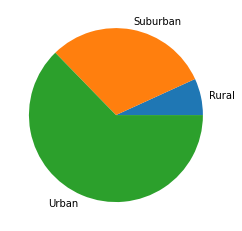

In [86]:
# Create the chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

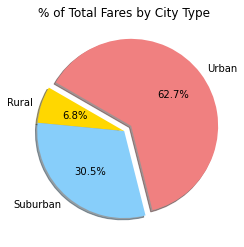

In [87]:
# Add formatting
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

### Add the Matplotlib main library to edit format for pie charts

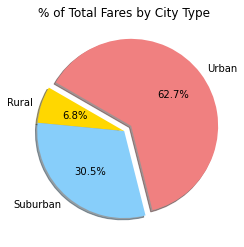

In [88]:
# Add the main matplotlib library
import matplotlib as mpl

# Build Pie Chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change formatting using mpl
mpl.rcParams['font.size'] = 14

# Save
plt.savefig("../analysis/Fig5.png")

# Show figure
plt.show()

## 5.6.1 Calculate percent of rides for pie charts

In [89]:
# This whole thing calculates the percents for each city type
# Use .count(), not .sum() because each ride-id amounts to one rides, so we ant to count them (not add them)
ride_percents = (pyber_data_df.groupby("type")["ride_id"].count()) / (pyber_data_df["ride_id"].count()) * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

## 5.6.2 Make the Pie Chart

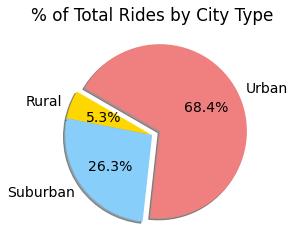

In [90]:
# Copy and paste from last pie chart, make small modifications

# Build Pie Chart
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change formatting using mpl
mpl.rcParams['font.size'] = 14

# Save
plt.savefig("../analysis/Fig6.png")

# Show figure
plt.show()

## 5.7.1 Percentages for total drivers

In [91]:
# Calculate percentages
driver_percents = (pyber_data_df.groupby("type")["driver_count"].sum()) / (pyber_data_df["driver_count"].sum()) * 100
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

## 5.7.2 Make and save pie chart, same way

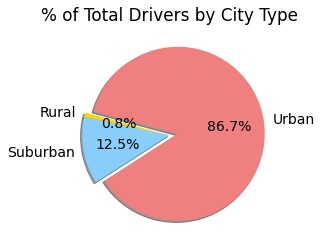

In [92]:
# Copy and paste

# Build Pie Chart
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change formatting using mpl
mpl.rcParams['font.size'] = 14

# Save
plt.savefig("../analysis/Fig7.png")

# Show figure
plt.show()